<a href="https://colab.research.google.com/github/roshangeoroy/CommunicationSimulations/blob/main/BPSK_%26_QPSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BPSK
1. Generate a string of message bits.
2. Encode using BPSK with energy per bit Eb and represent it using points in
a signal-space.
3. Simulate transmission of the BPSK modulated signal via an AWGN
channel with variance N0/2.
4. Detect using an ML decoder and plot the probability of error as a function
of SNR per bit Eb/N0.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
t=np.linspace(0,np.pi,100)
#Bit Generation
def bitG(a):
  b=np.random.randint(low=0,high=2,size=a)
  return b

In [45]:
def power(s):
  s=np.linalg.norm(s)/s.size
  return s

In [46]:
def energy(s):
  s=np.linalg.norm(s)
  return s

In [47]:
#Carrier Generation (Normalised)
def car(phase):
  c=np.cos((2*np.pi*t)-phase)
  e=np.linalg.norm(c)
  nc=c/e
  return nc
  

In [48]:
#BPSK of bit stream
def bpsk(a,nc):
  l=np.array([])
  for bit in a:
    if bit==0:
       l=np.concatenate([l,-nc],axis=0)
    else:
       l=np.concatenate([l,nc],axis=0)
  return l



In [49]:
#Trasmission through Channel
def awgn(k,sigma):
  n=np.random.normal(0,sigma,k.size)
  k=k+n 
  return k


In [50]:
#demodulation
def demod(l,nc):  
  z=len(l)
  y=len(nc)
  h=[]
  con=np.split(l,z/y)
  for ar in con:
      h.append(np.sum(nc*ar))
  h=np.array(h)
  return h

In [51]:
def ML_bpsk(a):
  a[a<=0]=0
  a[a>0]=1
  return a 

In [52]:
def error(i,o):
  return np.average(np.abs(i-o))
  

[1 1 0 1 1 1 1 0 1 1] [1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]
0.1


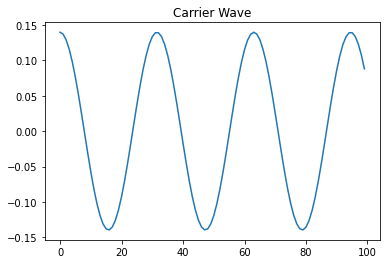

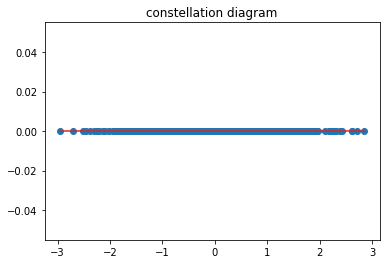

In [61]:
B=bitG(10)
c=car(0)
plt.figure()
plt.title("Carrier Wave")
plt.plot(c)
i=bpsk(B,c)
i=awgn(i,1)
plt.figure()
plt.title("constellation diagram")
plt.stem(i,np.zeros_like(i),use_line_collection=True)
i=demod(i,c)
i=ML_bpsk(i)
print(B,i)
print(error(B,i))


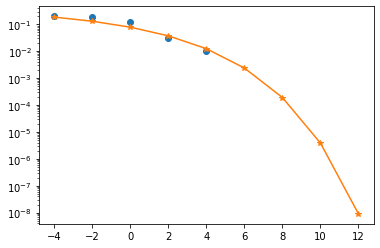

In [70]:
import math
snr = np.arange(-4,13,2)
#snr per bit is taken as [-4,-2,0....12]
#snr=10*np.log10(Eb/No)
#Since carrier is normalized, Eb is taken as 1. Therefore from the equation, No = 1/(10**(snr/10))
No = 1/(10**(snr/10))
ber=np.zeros_like(No)
for i in range(len(No)):
  b=bitG(100)
  c=car(0)
  j=bpsk(b,c)
  j=awgn(j,math.sqrt(No[i]/2))
  j=demod(j,c)
  j=ML_bpsk(j)
  ber[i]=error(b,j)
BER_theory = 0.5*erfc(np.sqrt(10**(snr/10)))
plt.semilogy(snr,ber,'o',label='BER')
plt.semilogy(snr,BER_theory,'*-',label='BER_theory')

#QPSK

In [90]:
b=bitG(1000)
#Demultiplexing
o=b[::2]
e=b[1::2]
b,o,e
c1=car(0)
c2=car(np.pi/2)
#Two Bpsk
o=bpsk(o,c1)
e=bpsk(e,c2)
#QPSK signal
l=o+e

l=awgn(l,1)

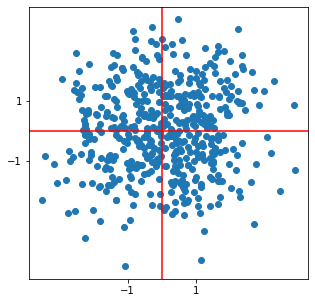

In [93]:
#Receiver End
p=demod(l,c1)
q=demod(l,c2)
plt.figure(figsize=(5,5))
plt.plot(p,q,'o')
plt.xticks([-1,1])
plt.yticks([-1,1])
plt.axhline(0, color='red')
plt.axvline(0, color='red')



0.166


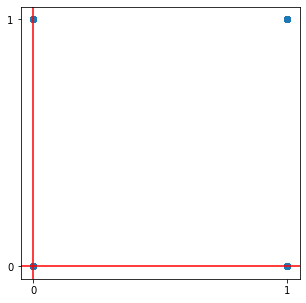

In [96]:
#multiplexing
X=[]
p=ML_bpsk(p)
q=ML_bpsk(q)
plt.figure(figsize=(5,5))
plt.plot(p,q,'o')
plt.xticks([0,1])
plt.yticks([0,1])
plt.axhline(0, color='red')
plt.axvline(0, color='red')

for i in range(len(p)):
  X.append(p[i])
  X.append(q[i])

BER=error(X,b)
print(BER)
